## 1. Importing Libraries

In [174]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode (connected=True)
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import plotly.io as pio
pio.renderers.default='notebook'
from IPython.display import Image

## 2. Loading Dataset

In [175]:
df=pd.read_csv('Space_Mission_Dataset.csv')

In [176]:
df.head(2)

,Unnamed: 0,Unnamed: 0.1,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success


In [177]:
df.shape

(4324, 9)

In [178]:
df.dtypes

Unnamed: 0         int64
Unnamed: 0.1       int64
Company Name      object
Location          object
Datum             object
Detail            object
Status Rocket     object
 Rocket           object
Status Mission    object
dtype: object

In [179]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      4324 non-null   int64 
 1   Unnamed: 0.1    4324 non-null   int64 
 2   Company Name    4324 non-null   object
 3   Location        4324 non-null   object
 4   Datum           4324 non-null   object
 5   Detail          4324 non-null   object
 6   Status Rocket   4324 non-null   object
 7    Rocket         964 non-null    object
 8   Status Mission  4324 non-null   object
dtypes: int64(2), object(7)
memory usage: 304.2+ KB


## 3. Data Cleaning

First we remove unnecessary columns.

In [180]:
df.drop(['Unnamed: 0','Unnamed: 0.1','Detail'], axis=1,inplace=True)

Next we create a dataframe that shows the percentage of null values in each column of df.

In [181]:
100*df.isnull().sum()/df.shape[0]

Company Name       0.000000
Location           0.000000
Datum              0.000000
Status Rocket      0.000000
 Rocket           77.705828
Status Mission     0.000000
dtype: float64

The Rocket column contains 77% null values, so we drop the entire column.

In [182]:
df.drop([' Rocket'], axis=1,inplace=True)

## 4. Feature Engineering

We rename some of the columns.

In [183]:
df.columns=df.columns.str.lower().str.replace(' ','_')

Now we change the format of date and remove month column from df.

In [184]:
df['datum']=pd.to_datetime(df['datum'])

In [185]:
type(df['datum'].iloc[0])

datetime.datetime

In [186]:
df['year']=df['datum'].apply(lambda x: x.year)

In [187]:
df.drop(['datum'], axis=1,inplace=True)

Now we extract the name of countries from the location column and add the country column to the dataframe.

In [188]:
df['country']=df['location'].apply(lambda x: x.split(',')[-1])

In [244]:
df.head(5)

,company_name,location,status_rocket,status_mission,year,country
0,46,"LC-39A, Kennedy Space Center, Florida, USA",0,Success,2020,20
1,7,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",0,Success,2020,3
2,46,"Pad A, Boca Chica, Texas, USA",0,Success,2020,20
3,42,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",0,Success,2020,10
4,48,"SLC-41, Cape Canaveral AFS, Florida, USA",0,Success,2020,20


## 5. Exploratory Data Analysis

We want to find the total number of missions conducted by each company.

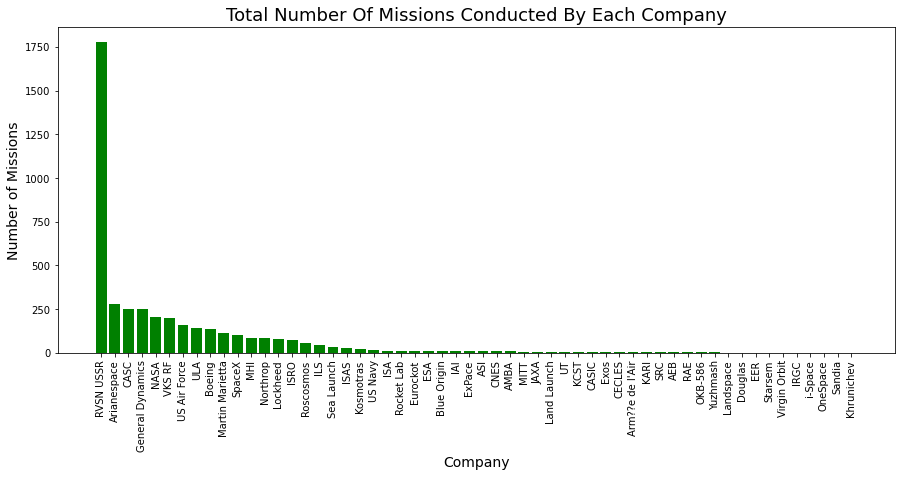

In [190]:
plt.figure(figsize=(15,6))
plt.bar(x=list(df['company_name'].value_counts().index), height=list(df['company_name'].value_counts()),color='g')
plt.xticks(rotation=90)
plt.xlabel('Company',fontsize=14)
plt.ylabel('Number of Missions',fontsize=14)
plt.title('Total Number Of Missions Conducted By Each Company',fontsize=18)
plt.show()

We visualize the status of missions conducted by each company.

In [191]:
new1=[]
for x in df['company_name'].unique():
    df1=df[df['company_name']==x]
    new1.append(df1[df1['status_mission']=='Success']['status_mission'].count())
    
new2=[]
for x in df['company_name'].unique():
    df1=df[df['company_name']==x]
    new2.append(df1[df1['status_mission']=='Failure']['status_mission'].count())
    
new3=[]
for x in df['company_name'].unique():
    df1=df[df['company_name']==x]
    new3.append(df1[df1['status_mission']=='Prelaunch Failure']['status_mission'].count())
    
new4=[]
for x in df['company_name'].unique():
    df1=df[df['company_name']==x]
    new4.append(df1[df1['status_mission']=='Partial Failure']['status_mission'].count())

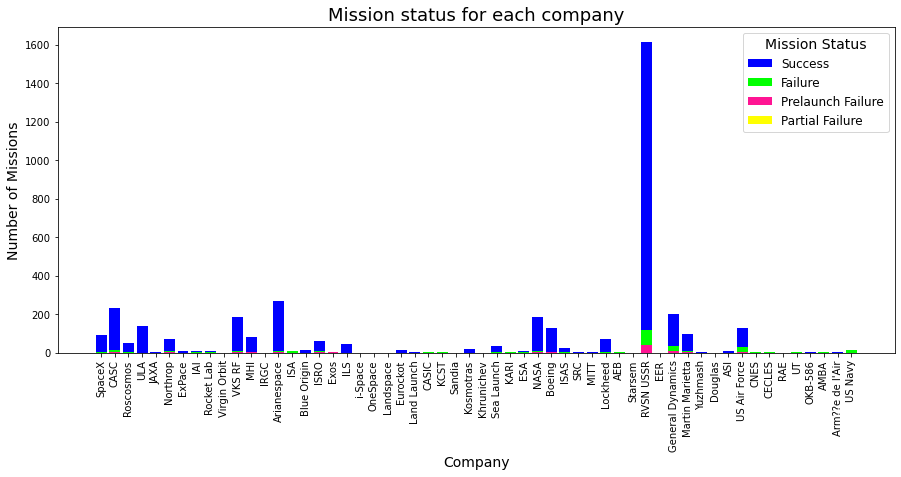

In [192]:
plt.figure(figsize=(15,6))
plt.bar(x=df['company_name'].unique(), height=new1, color='blue')
plt.bar(x=df['company_name'].unique(), height=new2, color='lime')
plt.bar(x=df['company_name'].unique(), height=new4, color='deeppink')
plt.bar(x=df['company_name'].unique(), height=new3, color='yellow')
plt.xticks(rotation=90)
plt.xlabel('Company',fontsize=14)
plt.ylabel('Number of Missions',fontsize=14)
plt.legend(['Success', 'Failure', 'Prelaunch Failure', 'Partial Failure'],fontsize=12, title='Mission Status', title_fontsize=14)
plt.title('Mission status for each company',fontsize=18)
plt.show()

We find the top 5 companies with the highest number of successful, failed, prelaunch failed and partially failed missions.

In [193]:
df_success=pd.DataFrame({'company':df['company_name'].unique(), 'successful_missions':new1})
df_success_sorted=df_success.sort_values(by='successful_missions',ascending=False).head(5)

df_failed=pd.DataFrame({'company':df['company_name'].unique(), 'failed_missions':new2})
df_failed_sorted=df_failed.sort_values(by='failed_missions',ascending=False).head(5)

df_prelaunch_failed =pd.DataFrame({'company':df['company_name'].unique(), 'prelaunch_failed _missions':new3})
df_prelaunch_failed_sorted=df_prelaunch_failed.sort_values(by='prelaunch_failed _missions',ascending=False).head(5)

df_partially_failed =pd.DataFrame({'company':df['company_name'].unique(), 'partially_failed _missions':new4})
df_partially_failed_sorted=df_partially_failed.sort_values(by='partially_failed _missions',ascending=False).head(5)

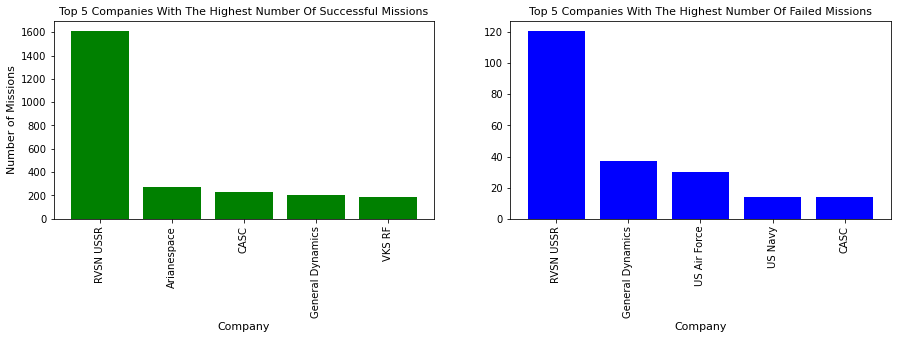

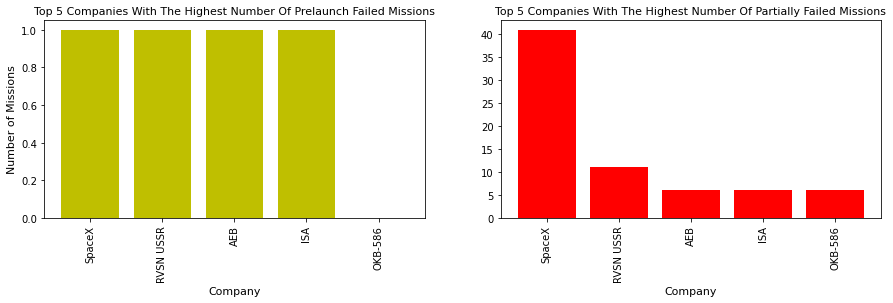

In [194]:
plt.figure(figsize=(15,8))
plt.subplot(2,2,1)
plt.bar(x=df_success_sorted['company'], height=df_success_sorted['successful_missions'],color='g')
plt.xticks(rotation=90)
plt.xlabel('Company',fontsize=11)
plt.ylabel('Number of Missions',fontsize=11)
plt.title('Top 5 Companies With The Highest Number Of Successful Missions',fontsize=11)

plt.subplot(2,2,2)
plt.bar(x=df_failed_sorted['company'], height=df_failed_sorted['failed_missions'],color='b')
plt.xticks(rotation=90)
plt.xlabel('Company',fontsize=11)
plt.title('Top 5 Companies With The Highest Number Of Failed Missions',fontsize=11)

plt.figure(figsize=(15,8))
plt.subplot(2,2,3)
plt.bar(x=df_prelaunch_failed_sorted['company'], height=df_prelaunch_failed_sorted['prelaunch_failed _missions'],color='y')
plt.xticks(rotation=90)
plt.xlabel('Company',fontsize=11)
plt.ylabel('Number of Missions',fontsize=11)
plt.title('Top 5 Companies With The Highest Number Of Prelaunch Failed Missions',fontsize=11)

plt.subplot(2,2,4)
plt.bar(x=df_prelaunch_failed_sorted['company'], height=df_partially_failed_sorted['partially_failed _missions'],color='r')
plt.xticks(rotation=90)
plt.xlabel('Company',fontsize=11)
plt.title('Top 5 Companies With The Highest Number Of Partially Failed Missions',fontsize=11)
plt.show()

Let's find the total number of active and retired rockets.

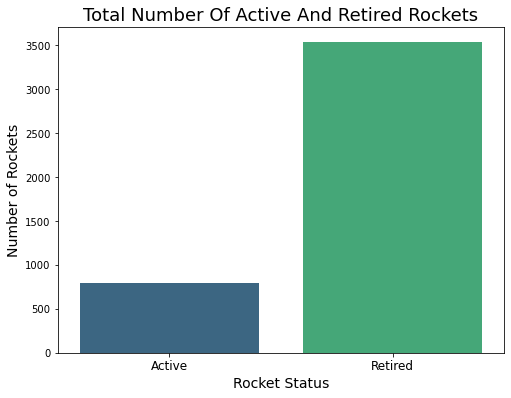

In [195]:
plt.figure(figsize=(8,6))
sns.countplot(x='status_rocket', data=df, palette='viridis')
plt.xticks([0,1], ['Active', 'Retired'], fontsize=12)
plt.xlabel('Rocket Status', fontsize=14)
plt.ylabel('Number of Rockets', fontsize=14)
plt.title('Total Number Of Active And Retired Rockets', fontsize=18)
plt.show()

We analyze the number of active and retired rockets in each company.

In [196]:
new5=[]
for x in df['company_name'].unique():
    df1=df[df['company_name']==x]
    new5.append(df1[df1['status_rocket']=='StatusActive']['status_rocket'].count())

new6=[]
for x in df['company_name'].unique():
    df1=df[df['company_name']==x]
    new6.append(df1[df1['status_rocket']=='StatusRetired']['status_rocket'].count())

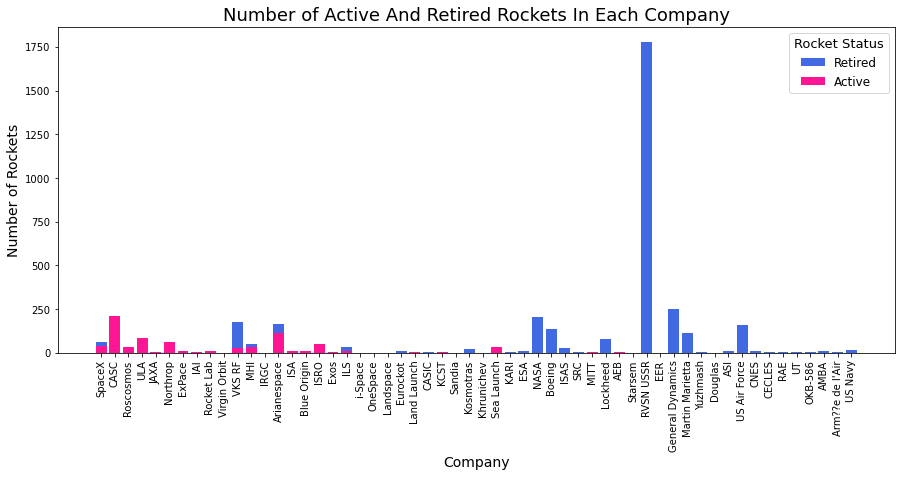

In [197]:
plt.figure(figsize=(15,6))
plt.bar(x=df['company_name'].unique(), height=new6,color='royalblue')
plt.bar(x=df['company_name'].unique(), height=new5,color='deeppink')
plt.xlabel('Company', fontsize=14)
plt.ylabel('Number of Rockets', fontsize=14)
plt.xticks(rotation=90)
plt.legend(['Retired', 'Active'], title='Rocket Status', fontsize=12, title_fontsize=13)
plt.title('Number of Active And Retired Rockets In Each Company', fontsize=18)
plt.show()

We find the status of missions in each year.

In [198]:
new7=[]
for x in df['year'].unique():
    df2=df[df['year']==x]
    new7.append(df2[df2['status_mission']=='Success']['status_mission'].count())

new8=[]
for x in df['year'].unique():
    df2=df[df['year']==x]
    new8.append(df2[df2['status_mission']=='Failure']['status_mission'].count())
    
new9=[]
for x in df['year'].unique():
    df2=df[df['year']==x]
    new9.append(df2[df2['status_mission']=='Prelaunch Failure']['status_mission'].count())
    
new10=[]
for x in df['year'].unique():
    df2=df[df['year']==x]
    new10.append(df2[df2['status_mission']=='Partial Failure']['status_mission'].count())    

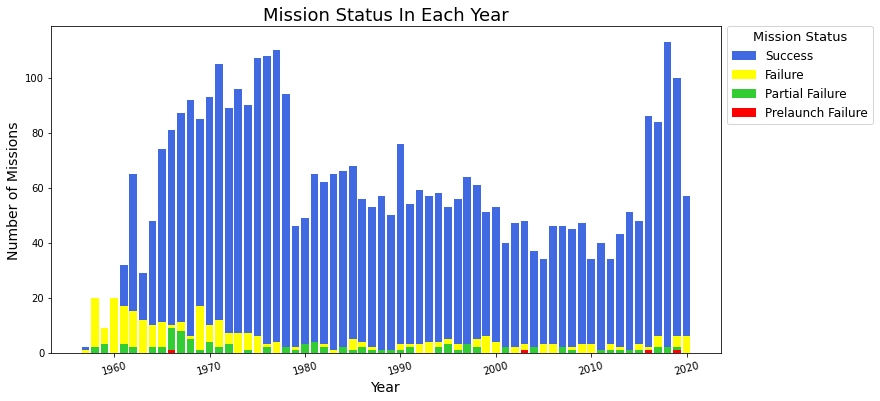

In [199]:
plt.figure(figsize=(12,6))
plt.bar(x=df['year'].unique(), height=new7,color='royalblue')
plt.bar(x=df['year'].unique(), height=new8,color='yellow')
plt.bar(x=df['year'].unique(), height=new10,color='limegreen')
plt.bar(x=df['year'].unique(), height=new9,color='red')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Missions', fontsize=14)
plt.xticks(rotation=15)
plt.legend(['Success', 'Failure','Partial Failure', 'Prelaunch Failure'], fontsize=12, title='Mission Status', title_fontsize=13, bbox_to_anchor=(1,1.02))
plt.title('Mission Status In Each Year', fontsize=18)
plt.show()

Let's find the top 15 locations with the highest number of missions.

In [200]:
df_loc=df.groupby(by='location').count().sort_values(by='company_name', ascending=False).head(15)

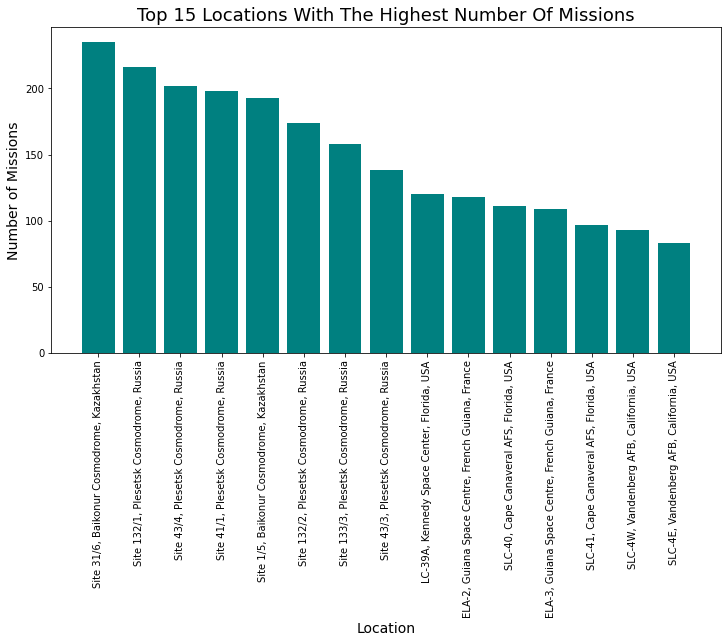

In [201]:
plt.figure(figsize=(12,6))
plt.bar(x=list(df_loc.index), height=df_loc['company_name'],color='teal')
plt.xlabel('Location', fontsize=14)
plt.ylabel('Number of Missions', fontsize=14)
plt.xticks(rotation=90)
plt.title('Top 15 Locations With The Highest Number Of Missions', fontsize=18)
plt.show()

Let's find the number of missions carried out in each country.

In [202]:
df_country=df.groupby('country').count().sort_values(by='company_name',ascending=False)

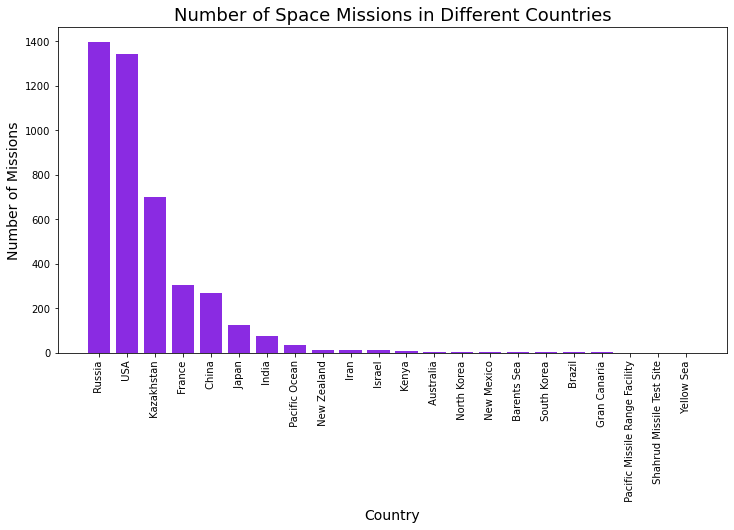

In [203]:
plt.figure(figsize=(12,6))
plt.bar(x=list(df_country.index), height=df_country['company_name'],color='blueviolet')
plt.xlabel('Country', fontsize=14)
plt.ylabel('Number of Missions', fontsize=14)
plt.xticks(rotation=90)
plt.title('Number of Space Missions in Different Countries', fontsize=18)
plt.show()

Russia carried out the highest number of missions and  USA was in the second place. 

In [204]:
df_country_10=df.groupby('country').count().sort_values(by='company_name',ascending=False).head(5)

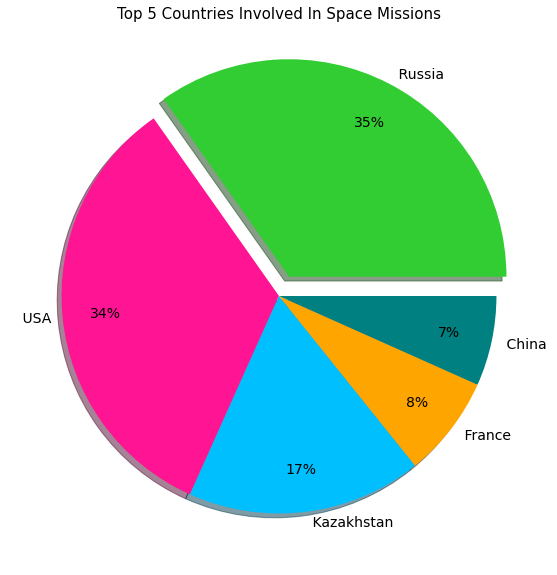

In [205]:
plt.figure(figsize=(10,10))
plt.pie(x=df_country_10['company_name'],labels=list(df_country_10.index), pctdistance=0.8, labeldistance=1.05,autopct='%1.0f%%',
  explode=(0.1,0,0,0,0),shadow=True,
    startangle=0,
  colors=['limegreen', 'deeppink', 'deepskyblue', 'orange','teal'],
    textprops={'fontsize':14})
plt.title('Top 5 Countries Involved In Space Missions', fontsize=15)
plt.show()

We analyze the status of missions in each country.

In [206]:
new11=[]
for x in df['country'].unique():
    df_count=df[df['country']==x]
    new11.append(df_count[df_count['status_mission']=='Success']['status_mission'].count())

new12=[]
for x in df['country'].unique():
    df_count=df[df['country']==x]
    new12.append(df_count[df_count['status_mission']=='Failure']['status_mission'].count())
    
new13=[]
for x in df['country'].unique():
    df_count=df[df['country']==x]
    new13.append(df_count[df_count['status_mission']=='Prelaunch Failure']['status_mission'].count())
    
new14=[]
for x in df['country'].unique():
    df_count=df[df['country']==x]
    new14.append(df_count[df_count['status_mission']=='Partial Failure']['status_mission'].count())

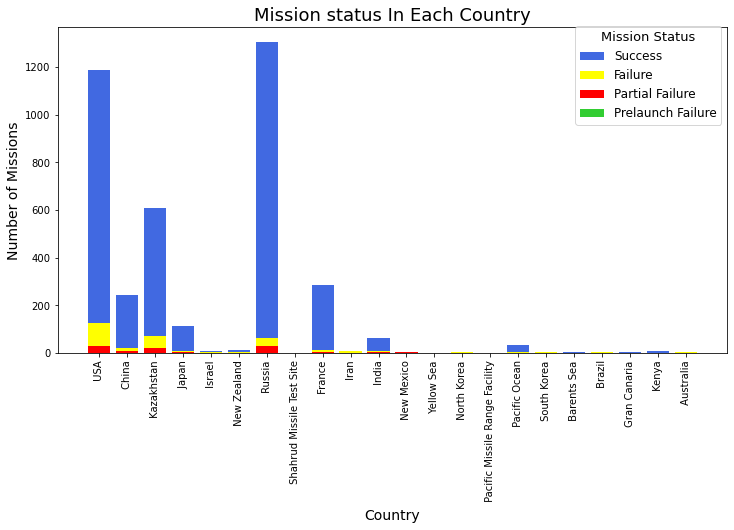

In [207]:
plt.figure(figsize=(12,6))
plt.bar(x=df['country'].unique(), height=new11,color='royalblue')
plt.bar(x=df['country'].unique(), height=new12,color='yellow')
plt.bar(x=df['country'].unique(), height=new14,color='red')
plt.bar(x=df['country'].unique(), height=new13,color='limegreen')
plt.xlabel('Country', fontsize=14)
plt.ylabel('Number of Missions', fontsize=14)
plt.xticks(rotation=90)
plt.legend(['Success', 'Failure','Partial Failure', 'Prelaunch Failure'], fontsize=12, title='Mission Status', title_fontsize=13, bbox_to_anchor=(1,1.02))
plt.title('Mission status In Each Country', fontsize=18)
plt.show()

Here we explore the number of missions carried out in US states.

In [208]:
df_usa=df[df['country']== ' USA']
df_usa['state']=df_usa['location'].apply(lambda x: x.split(',')[-2])
df_usa.head(2)

C:\Users\Eshan\AppData\Local\Temp/ipykernel_7372/775926119.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,company_name,location,status_rocket,status_mission,year,country,state
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",StatusActive,Success,2020,USA,Florida
2,SpaceX,"Pad A, Boca Chica, Texas, USA",StatusActive,Success,2020,USA,Texas


In [209]:
df_usa_sorted=df_usa.groupby('state').count().sort_values(by='company_name',ascending=False)

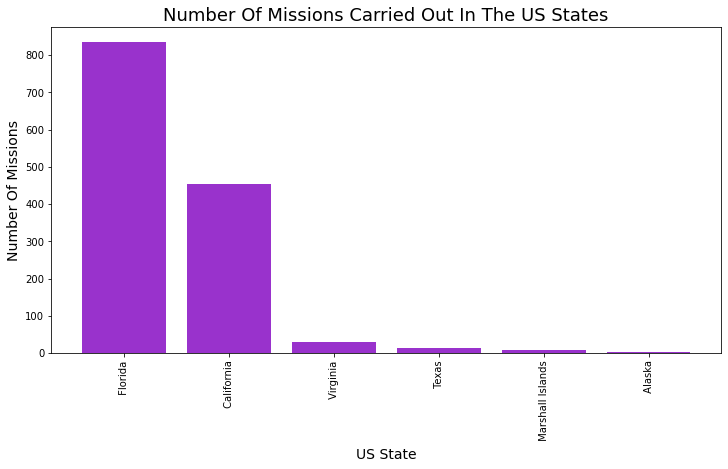

In [210]:
plt.figure(figsize=(12,6))
plt.bar(x=list(df_usa_sorted.index), height=df_usa_sorted['company_name'], color='darkorchid')
plt.xlabel('US State', fontsize=14)
plt.ylabel('Number Of Missions', fontsize=14)
plt.xticks(rotation=90)
plt.title('Number Of Missions Carried Out In The US States', fontsize=18)
plt.show()

In [211]:
m=[]
for x in df['country'].unique():
    n=[]
    df_c=df[df['country']== x]
    for y in df['year'].unique():
        df_y=df_c[df_c['year']==y]
        n.append(df_y.count()['year'])
    m.append(n)

In [212]:
pivot=pd.DataFrame(data=m, columns=df['year'].unique(), index=df['country'].unique())

In [213]:
pivot.head(2)

,2020,2019,2018,2017,2016,2015,2014,2013,2012,2011,...,1966,1965,1964,1963,1962,1961,1960,1959,1958,1957
USA,21,24,33,30,27,21,23,19,13,18,...,47,33,24,17,60,43,30,16,23,1
China,22,33,39,18,22,2,1,2,1,2,...,0,0,0,0,0,0,0,0,0,0


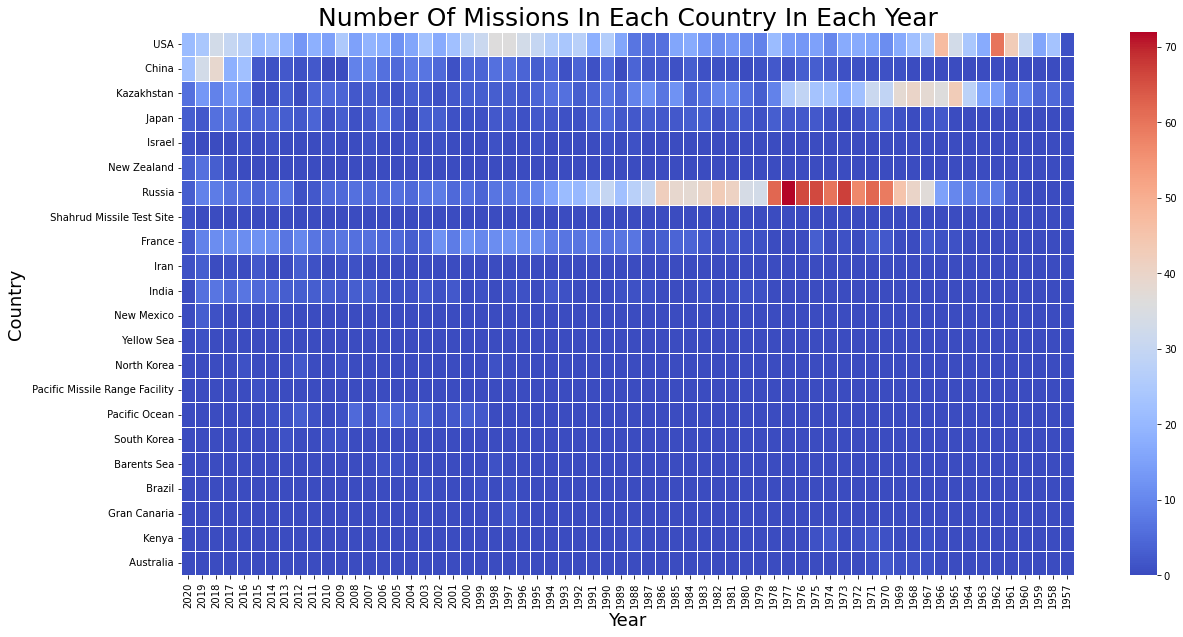

In [214]:
plt.figure(figsize=(20,10))
sns.heatmap(pivot,cmap='coolwarm',linecolor='white', linewidth= 1)
plt.xlabel('Year', fontsize=18)
plt.ylabel('Country', fontsize=18)
plt.title('Number Of Missions In Each Country In Each Year', fontsize=25)
plt.show()

# Company spending money in millions

In [238]:
data = pd.read_csv('Space_Corrected.csv')
data = data.drop(['Unnamed: 0','Unnamed: 0.1'],axis=1)
data[' Rocket'] = data[' Rocket'].str.replace(',', '')
data[' Rocket'] = data[' Rocket'].fillna(0)
data[' Rocket'] = data[' Rocket'].astype(float)
#data.head()
topcompany = data.groupby(['Company Name'])[' Rocket'].sum()
topcompany = topcompany.to_frame().reset_index()
topcompany.columns = ['Company Name','Spent Money']
topcompany = topcompany[topcompany['Spent Money']!=0]

<AxesSubplot:xlabel='Spent Money', ylabel='Company Name'>

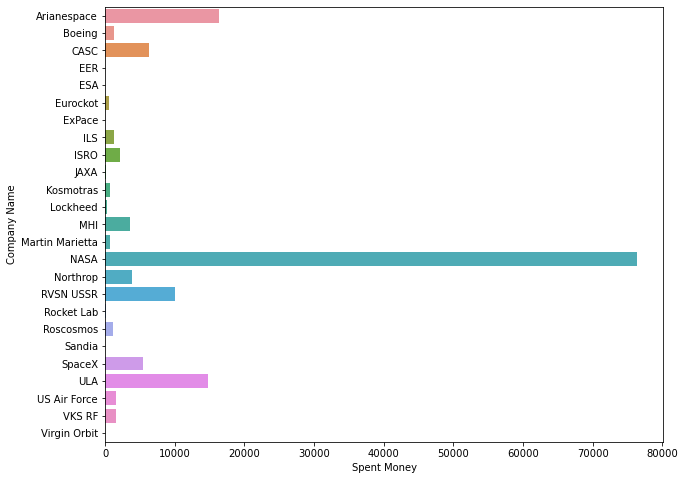

In [239]:
plt.figure(figsize=(10,8))
sns.barplot(data = topcompany, y ='Company Name',x = 'Spent Money')

## 6. Prediction of the Status of Missions

### 6.1. Label Encoding

**Company**

In [215]:
le1=LabelEncoder()
le1.fit(df['company_name'])
df['company_name']=le1.transform(df['company_name'])

**Status Rocket**

In [216]:
le2=LabelEncoder()
le2.fit(df['status_rocket'])
df['status_rocket']=le2.transform(df['status_rocket'])

**Country**

In [217]:
le3=LabelEncoder()
le3.fit(df['country'])
df['country']=le3.transform(df['country'])

In [245]:
df.head(5)

,company_name,location,status_rocket,status_mission,year,country
0,46,"LC-39A, Kennedy Space Center, Florida, USA",0,Success,2020,20
1,7,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",0,Success,2020,3
2,46,"Pad A, Boca Chica, Texas, USA",0,Success,2020,20
3,42,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",0,Success,2020,10
4,48,"SLC-41, Cape Canaveral AFS, Florida, USA",0,Success,2020,20


### 6.2. Splitting the Data

In [219]:
X=df[['company_name', 'status_rocket', 'year', 'country']]
y= df['status_mission']

In [220]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 6.3. Logistic Regression

In [221]:
lr=LogisticRegression()
lr.fit(X,y)
predictions_lr=lr.predict(X_test)

C:\Users\Eshan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [222]:
print(confusion_matrix(y_test,predictions_lr))
print('\n')
print(classification_report(y_test,predictions_lr))

[[  0   0   0  67]
 [  0   0   0  19]
 [  0   0   0   1]
 [  0   0   0 778]]


                   precision    recall  f1-score   support

          Failure       0.00      0.00      0.00        67
  Partial Failure       0.00      0.00      0.00        19
Prelaunch Failure       0.00      0.00      0.00         1
          Success       0.90      1.00      0.95       778

         accuracy                           0.90       865
        macro avg       0.22      0.25      0.24       865
     weighted avg       0.81      0.90      0.85       865



C:\Users\Eshan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\Eshan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\Eshan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



This model is pretty bad because of zero values

### 6.4. Decision Tree Classifier

In [223]:
dtc=DecisionTreeClassifier()
dtc.fit(X_train,y_train)
predictions_dtc=dtc.predict(X_test)

In [224]:
print(confusion_matrix(y_test,predictions_dtc))
print('\n')
print(classification_report(y_test,predictions_dtc))

[[ 16   1   0  50]
 [  3   0   0  16]
 [  1   0   0   0]
 [ 25   7   0 746]]


                   precision    recall  f1-score   support

          Failure       0.36      0.24      0.29        67
  Partial Failure       0.00      0.00      0.00        19
Prelaunch Failure       0.00      0.00      0.00         1
          Success       0.92      0.96      0.94       778

         accuracy                           0.88       865
        macro avg       0.32      0.30      0.31       865
     weighted avg       0.85      0.88      0.87       865



C:\Users\Eshan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\Eshan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\Eshan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



### 6.5. Random Forest Classifier

In [225]:
rfc=RandomForestClassifier(n_estimators=200)
rfc.fit(X_train,y_train)
predictions_rfc=rfc.predict(X_test)

In [226]:
print(confusion_matrix(y_test,predictions_rfc))
print('\n')
print(classification_report(y_test,predictions_rfc))

[[ 14   1   0  52]
 [  0   1   0  18]
 [  1   0   0   0]
 [ 18   5   0 755]]


                   precision    recall  f1-score   support

          Failure       0.42      0.21      0.28        67
  Partial Failure       0.14      0.05      0.08        19
Prelaunch Failure       0.00      0.00      0.00         1
          Success       0.92      0.97      0.94       778

         accuracy                           0.89       865
        macro avg       0.37      0.31      0.32       865
     weighted avg       0.86      0.89      0.87       865



C:\Users\Eshan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\Eshan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\Eshan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



### 6.6. Support Vector Classifier

In [227]:
svc=SVC()
svc.fit(X_train,y_train)
predictions_svc=svc.predict(X_test)

In [228]:
print(confusion_matrix(y_test,predictions_svc))
print('\n')
print(classification_report(y_test,predictions_svc))

[[  0   0   0  67]
 [  0   0   0  19]
 [  0   0   0   1]
 [  0   0   0 778]]


                   precision    recall  f1-score   support

          Failure       0.00      0.00      0.00        67
  Partial Failure       0.00      0.00      0.00        19
Prelaunch Failure       0.00      0.00      0.00         1
          Success       0.90      1.00      0.95       778

         accuracy                           0.90       865
        macro avg       0.22      0.25      0.24       865
     weighted avg       0.81      0.90      0.85       865



C:\Users\Eshan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\Eshan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\Eshan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



To improve the results obtained by SVC, we use GridSearchCV and define C and gamma parameters.

In [229]:
param_grid={'C':[0.1,1,10,100,1000], 'gamma':[1,0.1,0.01,0.001,0.0001],'kernel':['rbf']}

In [230]:
gs=GridSearchCV(SVC(),param_grid, verbose=3)
gs.fit(X_train,y_train)
predictions_gs=gs.predict(X_test)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


C:\Users\Eshan\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning:

The least populated class in y has only 3 members, which is less than n_splits=5.



[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.897 total time=   0.4s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.896 total time=   0.3s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.896 total time=   0.4s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.896 total time=   0.3s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.897 total time=   0.4s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.897 total time=   0.1s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.896 total time=   0.1s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.896 total time=   0.1s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.896 total time=   0.1s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.897 total time=   0.1s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.897 total time=   0.1s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.896 total time=   0.1s
[CV 3/5] END .....C=0.1, gam

[CV 3/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.892 total time=   0.5s
[CV 4/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.896 total time=   0.4s
[CV 5/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.894 total time=   0.4s
[CV 1/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.877 total time=   4.7s
[CV 2/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.887 total time=   4.2s
[CV 3/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.893 total time=  10.5s
[CV 4/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.890 total time=   4.0s
[CV 5/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.896 total time=   3.2s
[CV 1/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.879 total time=   5.0s
[CV 2/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.887 total time=  10.7s
[CV 3/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.893 total time=   8.5s
[CV 4/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.887 total time=   8.9s
[CV 5/5] END ....C=1000, gam

In [231]:
print(confusion_matrix(y_test,predictions_gs))
print('\n')
print(classification_report(y_test,predictions_gs))

[[  9   1   0  57]
 [  1   0   0  18]
 [  0   0   0   1]
 [  4   0   0 774]]


                   precision    recall  f1-score   support

          Failure       0.64      0.13      0.22        67
  Partial Failure       0.00      0.00      0.00        19
Prelaunch Failure       0.00      0.00      0.00         1
          Success       0.91      0.99      0.95       778

         accuracy                           0.91       865
        macro avg       0.39      0.28      0.29       865
     weighted avg       0.87      0.91      0.87       865



C:\Users\Eshan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\Eshan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\Eshan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [232]:
print('Accuracy Score, Logistic Regression: ', round(accuracy_score(y_test,predictions_lr),ndigits=4))
print('Accuracy Score, Decision Tree Classifier: ', round(accuracy_score(y_test,predictions_dtc),ndigits=4))
print('Accuracy Score, Random Forest Classifier: ', round(accuracy_score(y_test,predictions_rfc),ndigits=4))
print('Accuracy Score, Support Vector Classifier: ', round(accuracy_score(y_test,predictions_gs),ndigits=4))

Accuracy Score, Logistic Regression:  0.8994
Accuracy Score, Decision Tree Classifier:  0.8809
Accuracy Score, Random Forest Classifier:  0.8902
Accuracy Score, Support Vector Classifier:  0.9052


So we conclude that Support Vector Classifier for which the hyper-parameters were tuned by Grid Search has an accuracy of 90.52%, and so it is the best model for predicting the status of the missions.

## 7. Conclusion

-  We performed Data Cleaning and Feature Engineering to convert the dataset to an acceptable format.

-  We performed Exploratory Data Analysis and visualized the number of missions versus different features.

-  Support Vector Classifier which was optimized by Grid Search with the accuracy of 90.52% was the best model for predicting  the status of the missions.